### Sequential API of Keras

In [1]:
from tensorflow import keras

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [2]:
f_mnist = keras.datasets.fashion_mnist

In [3]:
f_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Anaconda\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [6]:
(X_train, y_train), (X_test, y_test) = f_mnist.load_data()

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

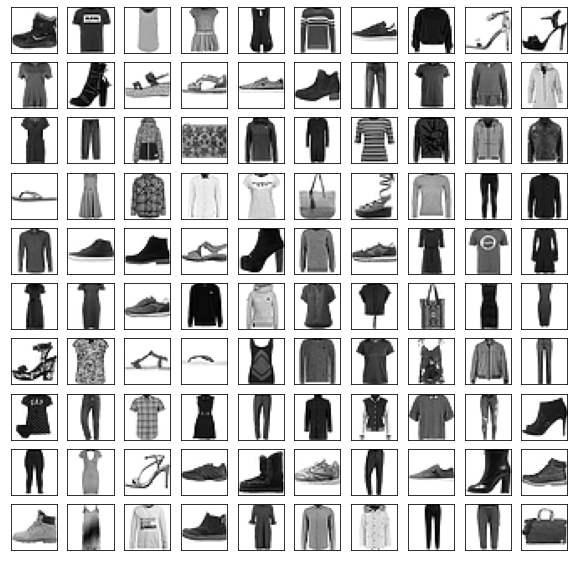

In [50]:
fig, ax = plt.subplots(10,10,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(X_train[i], cmap='binary')
    axi.set(xticks=[],yticks=[])

In [52]:
X_valid, X_train = X_train[:5000]/255, X_train[5000:]/255
y_valid, y_train = y_train[:5000]/255, y_train[5000:]/255

dtype('float64')

In [54]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics='accuracy')


In [75]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid),epochs=30)

Epoch 1/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5689e-05 - accuracy: 0.1012 - val_loss: 1.5550e-05 - val_accuracy: 0.0970
Epoch 2/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5421e-05 - accuracy: 0.1012 - val_loss: 1.5291e-05 - val_accuracy: 0.0970
Epoch 3/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5159e-05 - accuracy: 0.1012 - val_loss: 1.5030e-05 - val_accuracy: 0.0970
Epoch 4/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4888e-05 - accuracy: 0.1012 - val_loss: 1.4737e-05 - val_accuracy: 0.0970
Epoch 5/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4590e-05 - accuracy: 0.1012 - val_loss: 1.4458e-05 - val_accuracy: 0.0970
Epoch 6/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4333e-05 - accuracy: 0.1012 - val_loss: 1.4210e-05 - val_accuracy: 0.0970
Epoch 7/30
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4102e-05 -

In [79]:
his = pd.DataFrame(history.history)
his

,loss,accuracy,val_loss,val_accuracy
0,0.000016,0.10116,0.000016,0.097
1,0.000015,0.10116,0.000015,0.097
2,0.000015,0.10116,0.000015,0.097
3,0.000015,0.10116,0.000015,0.097
4,0.000015,0.10116,0.000014,0.097
5,0.000014,0.10116,0.000014,0.097
6,0.000014,0.10116,0.000014,0.097
7,0.000014,0.10116,0.000014,0.097
8,0.000014,0.10116,0.000014,0.097
9,0.000013,0.10116,0.000013,0.097


## Regression with neural networks

In [123]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [124]:
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [125]:
X = pd.DataFrame(housing.data,columns=housing.feature_names)

In [126]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [127]:
pd.Series(housing.target).describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

In [128]:
X_f_train, X_test, Y_f_train, Y_test = train_test_split(housing.data, housing.target, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_f_train, Y_f_train, test_size=0.25, random_state=42)

In [129]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [130]:
[X_train.shape[1]]

[8]

In [131]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [139]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error')

In [157]:
model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20)

Epoch 1/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3105 - mean_squared_error: 0.3105 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 2/20
387/387 [==============================] - 1s 2ms/step - loss: 0.3066 - mean_squared_error: 0.3066 - val_loss: 0.3309 - val_mean_squared_error: 0.3309
Epoch 3/20
387/387 [==============================] - 1s 1ms/step - loss: 0.3068 - mean_squared_error: 0.3068 - val_loss: 0.3397 - val_mean_squared_error: 0.3397
Epoch 4/20
387/387 [==============================] - 1s 1ms/step - loss: 0.3057 - mean_squared_error: 0.3057 - val_loss: 0.3507 - val_mean_squared_error: 0.3507
Epoch 5/20
387/387 [==============================] - 1s 1ms/step - loss: 0.3077 - mean_squared_error: 0.3077 - val_loss: 0.3559 - val_mean_squared_error: 0.3559
Epoch 6/20
387/387 [==============================] - 1s 1ms/step - loss: 0.3102 - mean_squared_error: 0.3102 - val_loss: 0.3167 - val_mean_squared_error: 0.3167
Epoch 7/20
387/387 [========

In [158]:
eval_result = model.evaluate(X_test, Y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3221 - mean_squared_error: 0.3221


In [159]:
Y_predict = model.predict(X_test)

In [161]:
pd.DataFrame(np.concatenate([Y_test.reshape(-1,1), Y_predict.reshape(-1,1)], axis=1),columns=['Y_test', 'Y_predict'])

,Y_test,Y_predict
0,0.47700,0.349694
1,0.45800,1.079420
2,5.00001,4.422559
3,2.18600,2.462739
4,2.78000,2.810715
...,...,...
4123,2.63300,2.120067
4124,2.66800,2.580270
4125,5.00001,4.736854
4126,0.72300,0.753984


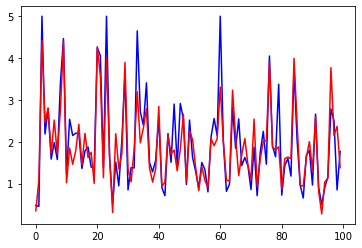

In [165]:
plt.plot(np.arange(100),Y_test[:100],'b-')
plt.plot(np.arange(100),Y_predict[:100],'r-')
plt.show()

### Working on MNIST dataset with Shallow Neural Networks


In [4]:
mnist = keras.datasets.mnist
(Xtrain, Ytrain), (Xtest, Ytest) = mnist.load_data()

In [5]:
Xtrain.shape

(60000, 28, 28)

In [6]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, random_state=42, test_size=0.3)

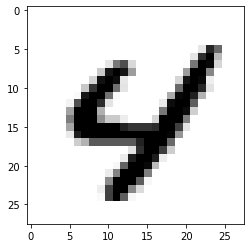

4


In [7]:
plt.imshow(Xtrain[1], cmap='binary')
plt.show()
print(Ytrain[1])

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(200, activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(200, activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

C:\Anaconda\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [12]:
history = model.fit(Xtrain,Ytrain, epochs=20,validation_data=(Xval, Yval),callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0912 - accuracy: 0.9822 - val_loss: 0.2500 - val_accuracy: 0.9675
Epoch 2/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0715 - accuracy: 0.9835 - val_loss: 0.3254 - val_accuracy: 0.9661
Epoch 3/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0729 - accuracy: 0.9836 - val_loss: 0.2610 - val_accuracy: 0.9658
Epoch 4/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0730 - accuracy: 0.9835 - val_loss: 0.3661 - val_accuracy: 0.9589
Epoch 5/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0742 - accuracy: 0.9839 - val_loss: 0.2661 - val_accuracy: 0.9677
Epoch 6/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0554 - accuracy: 0.9870 - val_loss: 0.3615 - val_accuracy: 0.9644
Epoch 7/20
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0804 - accuracy: 0.9847 - val_loss: 0.3633 - val_accuracy:

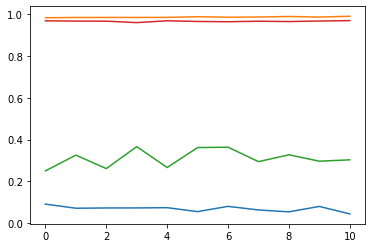

In [13]:
plt.plot(pd.DataFrame(history.history))

In [14]:
model.evaluate(Xtest, Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.3002 - accuracy: 0.9688


[0.30023959279060364, 0.9688000082969666]

### Working again on Fashion MNIST

In [19]:
f_mnist = keras.datasets.fashion_mnist

In [20]:
(Xtrain, Ytrain), (Xtest, Ytest) = f_mnist.load_data()

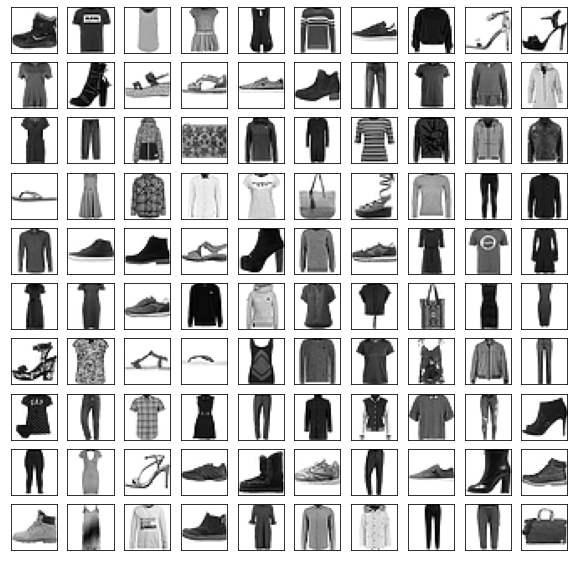

In [22]:
fig, ax = plt.subplots(10,10,figsize=(10,10))
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtrain[i], cmap='binary')
    axi.set(xticks=[],yticks=[])

In [24]:
Xtrain = Xtrain/255
Xtest = Xtest/255

In [25]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain,Ytrain,test_size=0.3,random_state=42)

In [26]:
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(100, activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001),metrics='accuracy')

In [28]:
model.fit(Xtrain,Ytrain,validation_data=(Xval,Yval),epochs=20,callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/20
1313/1313 [==============================] - 7s 5ms/step - loss: 0.5026 - accuracy: 0.8159 - val_loss: 0.4600 - val_accuracy: 0.8221
Epoch 2/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3834 - accuracy: 0.8564 - val_loss: 0.3810 - val_accuracy: 0.8592
Epoch 3/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3493 - accuracy: 0.8699 - val_loss: 0.3754 - val_accuracy: 0.8638
Epoch 4/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3242 - accuracy: 0.8789 - val_loss: 0.3476 - val_accuracy: 0.8741
Epoch 5/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3009 - accuracy: 0.8867 - val_loss: 0.3332 - val_accuracy: 0.8802
Epoch 6/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2865 - accuracy: 0.8935 - val_loss: 0.3494 - val_accuracy: 0.8769
Epoch 7/20
1313/1313 [==============================] - 6s 5ms/step - loss: 0.2732 - accuracy: 0.8964 - val_loss: 0.3409 - val_accuracy:

In [29]:
model.evaluate(Xtest,Ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.4293 - accuracy: 0.8705


[0.4292968809604645, 0.8705000281333923]

## LeNet-05(modified)

In [34]:
(X,Y),(Xtest,Ytest) = keras.datasets.mnist.load_data()

In [35]:
from random import randint

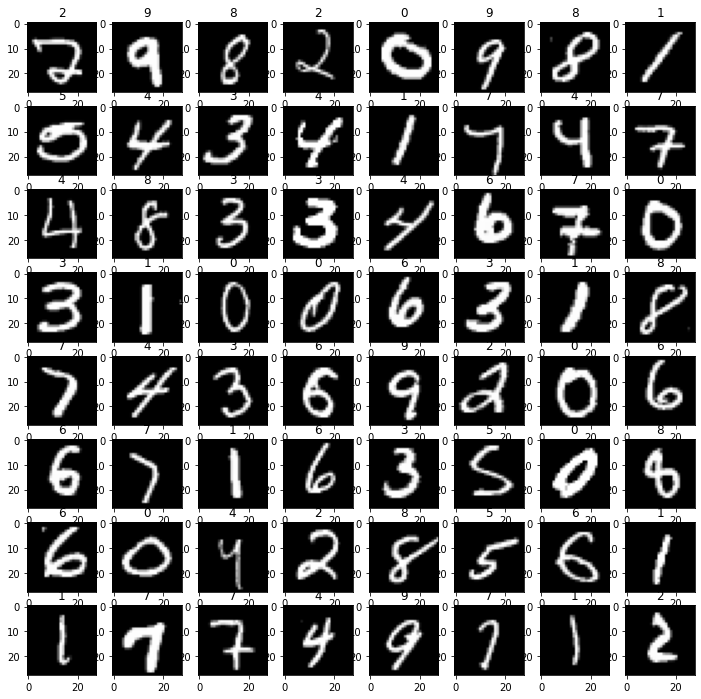

In [36]:
plt.figure(figsize=(12,12))
for i in range(64):
    plt.subplot(8,8,i+1)
    x=randint(0,60000)
    plt.imshow(X[x],cmap='gray')
    plt.title(Y[x])

In [37]:
X.shape

(60000, 28, 28)

In [38]:
X=X/255
Xtest=Xtest/255

In [39]:
from sklearn.model_selection import train_test_split
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, random_state=42, test_size=0.3)

In [48]:
Xtrain = Xtrain.reshape(42000,28,28,1)
Xval = Xval.reshape(18000,28,28,1)
Xtest = Xtest.reshape(10000,28,28,1)

In [49]:
model = keras.Sequential([
    keras.layers.Conv2D(6,5,padding='same',activation='elu',kernel_initializer='he_normal',input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Conv2D(16,5,activation='elu',kernel_initializer='he_normal'),
    keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(84,activation='elu',kernel_initializer='he_normal'),
    keras.layers.Dense(10,activation='softmax')
])

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [51]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.99),metrics='accuracy')

In [52]:
summary = model.fit(Xtrain, Ytrain, validation_data=(Xval, Yval),epochs=20,callbacks=keras.callbacks.EarlyStopping(patience=10))

Epoch 1/20
1313/1313 [==============================] - 36s 25ms/step - loss: 0.1831 - accuracy: 0.9431 - val_loss: 0.0866 - val_accuracy: 0.9733
Epoch 2/20
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0575 - val_accuracy: 0.9827
Epoch 3/20
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0405 - accuracy: 0.9874 - val_loss: 0.0690 - val_accuracy: 0.9809
Epoch 4/20
1313/1313 [==============================] - 32s 24ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0742 - val_accuracy: 0.9811
Epoch 5/20
1313/1313 [==============================] - 32s 25ms/step - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0570 - val_accuracy: 0.9857
Epoch 6/20
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0190 - accuracy: 0.9936 - val_loss: 0.0635 - val_accuracy: 0.9864
Epoch 7/20
1313/1313 [==============================] - 34s 26ms/step - loss: 0.0168 - accuracy: 0.9946 - val_loss: 0.0674 -

In [53]:
model.evaluate(Xtest, Ytest)

313/313 [==============================] - 2s 8ms/step - loss: 0.0753 - accuracy: 0.9878


[0.07525254040956497, 0.9878000020980835]

In [58]:
Ypredict = np.argmax(model.predict(Xtest), axis=-1)
Ypredict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Ytest, Ypredict)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    0,    1],
       [   0, 1131,    0,    1,    0,    0,    2,    1,    0,    0],
       [   3,    0, 1022,    2,    2,    0,    0,    3,    0,    0],
       [   0,    1,    1,  996,    0,    5,    0,    2,    5,    0],
       [   0,    0,    0,    0,  979,    0,    1,    0,    0,    2],
       [   4,    0,    1,   10,    0,  873,    1,    1,    1,    1],
       [  14,    1,    0,    0,    3,    1,  939,    0,    0,    0],
       [   0,    1,    4,    1,    1,    0,    0, 1018,    1,    2],
       [   2,    1,    3,    0,    0,    0,    0,    3,  962,    3],
       [   1,    1,    2,    3,   11,    2,    0,    9,    0,  980]],
      dtype=int64)